# Assignment_1 
### Monoalphabetic Cipher

In [149]:
import matplotlib.pyplot as plt
import pandas as pd  
from random import randint
import re
import math

from string import ascii_lowercase as letters


In [3]:
# using a book to read the freq of occurance of letters  [ The Adventures of Sherlock Holmes by Arthur Conan Doyle ]

with open("text.txt") as f:
    text = f.read().lower()
    letterDict = dict((l, text.count(l)) for l in letters)
    print(letterDict)

{'a': 36142, 'b': 6638, 'c': 11103, 'd': 19100, 'e': 54944, 'f': 9363, 'g': 8299, 'h': 29579, 'i': 31248, 'j': 544, 'k': 3681, 'l': 17636, 'm': 12155, 'n': 29731, 'o': 34869, 'p': 7284, 'q': 437, 'r': 25684, 's': 27965, 't': 40511, 'u': 13636, 'v': 4572, 'w': 11534, 'x': 577, 'y': 9760, 'z': 153}


In [199]:
# this func will take our dictionary variable as input 
# which contain letters as 'keys' and their freqence as 'values'
# and plot it for us 

def plotDict(dict,title):
    
    y = dict.values()
    x = range(len(dict))


    plt.rcParams['figure.figsize'] = [15, 5]
    axes = plt.gca()
    axes.set_ylim([0,max(dict.values())+5])


    plt.bar(x, y,  color = (0.3,0.1,0.4,0.6), align='center')

    plt.xticks(range(len(letterDict)), list(letterDict.keys()))

    label = list(y)
    

    # Text on the top of each barplot
    
    for a,b in zip(x, y):
        plt.text(a-0.2, b+2.5  , str(b) ,size = 10 , rotation=90)

    plt.title(title)
    plt.xticks(rotation=70)

    plt.xlabel(' letters ')
    plt.ylabel(' frequency of occurence')

    plt.show()


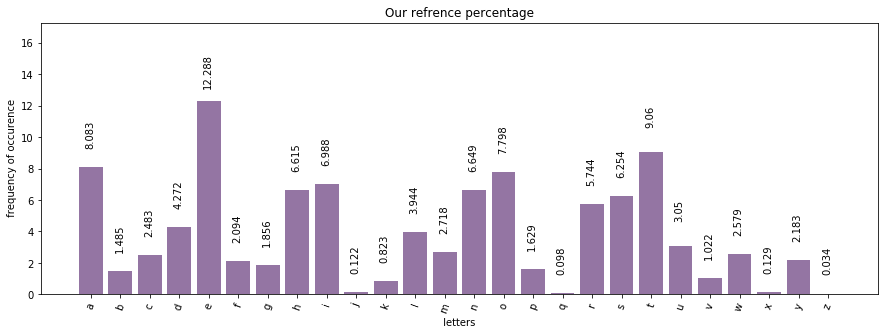

In [222]:
plotDict(letterDict,"Our refrence percentage")

## now lets create a private key and use it to encrypt a file 

In [213]:
#  a  - z
# 97 - 122

private_key = []

# creat our private key y mapping each letter to random lowerCase letter 
randarray = random.sample(range(97, 123), 123-97)

for num in randarray:
    private_key.append(chr(num))

# #create dictionary 
dictionary = dict(zip(letters, private_key))
dictionary



{'a': 'm',
 'b': 'f',
 'c': 'l',
 'd': 'p',
 'e': 'g',
 'f': 'k',
 'g': 'o',
 'h': 'c',
 'i': 'h',
 'j': 'a',
 'k': 'z',
 'l': 'n',
 'm': 'd',
 'n': 'u',
 'o': 'q',
 'p': 'e',
 'q': 'w',
 'r': 'b',
 's': 's',
 't': 'v',
 'u': 'y',
 'v': 'i',
 'w': 'x',
 'x': 'j',
 'y': 't',
 'z': 'r'}

In [214]:
# use private key to encrypt  any text file

with open("article.txt") as f:
    text = f.read().lower()
    tmp = text

    
    
cipherText = text.translate(str.maketrans(dictionary))  ## this fnction will do the magic XD

In [215]:
# saving our generated encrypted text in a file 

with open('cipher.txt', 'w') as file:
    file.write(cipherText)

## performing statistical cryptanalysis on the obtained ciphertext

In [216]:
# lets now try to read our encrypted file and check the freq of occurnce of letterss within it 
with open("cipher.txt") as f:
    text = f.read().lower()
    letter_only  = re.sub("[^a-z]","",text)    #remove any other chars !! 
    
cipherDict = {}
     
for l in letters:
    val = format( (text.count(l)/len(letter_only)*100)   , '.3f' )
    cipherDict.update({l : float(val)})
print(cipherDict)

{'a': 0.156, 'b': 5.554, 'c': 4.899, 'd': 2.518, 'e': 1.814, 'f': 1.963, 'g': 12.049, 'h': 7.112, 'i': 0.935, 'j': 0.424, 'k': 2.157, 'l': 3.316, 'm': 7.524, 'n': 4.394, 'o': 2.094, 'p': 3.883, 'q': 7.96, 'r': 0.075, 's': 6.439, 't': 2.144, 'u': 7.156, 'v': 9.761, 'w': 0.1, 'x': 1.939, 'y': 2.842, 'z': 0.792}


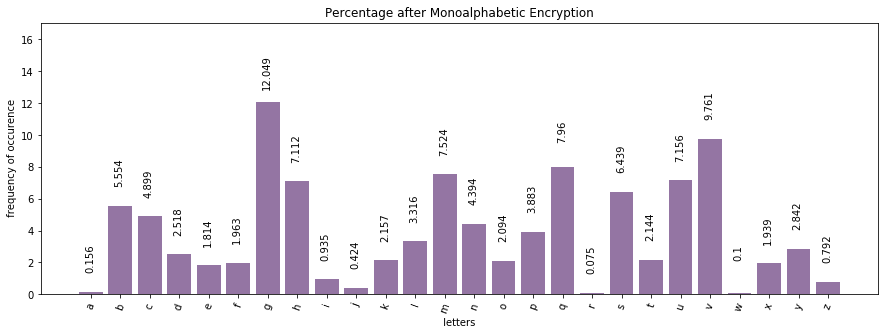

In [221]:
plotDict(cipherDict,"Percentage after Monoalphabetic Encryption")

### the plot show that the mapped letters has very close value to their real letters in our refrence plot

# Assignment_2  
### Poly Substitution  with n=4    {  k1=3 , k2=5 , k3= -5 , k4= -3  }   

In [134]:
# use private key to encrypt  any text file

with open("article.txt") as f:
    text = f.read().lower()
    tmp = text



n = 4
key = [3,5,-5,-3]
mylist = list(text)
cipher = []

# a-1 =  z 
# 97 -1  =====> 122

In [135]:
for l in range(len(text)):
    if ord(text[l]) not in range(97, 122):
        cipher.append(  text[l]  )
        continue
    
    ascii_val  = ord(text[l]) + key[k]
    
    if ascii_val < 97 :
        ascii_val += 26
    elif ascii_val > 122:
        ascii_val -= 26
    
    new_char = chr(ascii_val)
    cipher.append(  new_char  )


cipher_str = ''.join(str(e) for e in cipher)


In [136]:
# saving our generated encrypted text in a file 

with open('poly_cipher.txt', 'w') as file:
    file.write(cipher_str)

## performing statistical cryptanalysis on the obtained ciphertext

In [218]:
# lets now try to read our encrypted file and check the freq of occurnce of letterss within it 
with open("poly_cipher.txt") as f:
    text = f.read().lower()
    letter_only  = re.sub("[^a-z]","",text)    #remove any other chars !! 
    
polycipherDict = {}
     
for l in letters:
    val = format( (text.count(l)/len(letter_only)*100)   , '.3f' )
    polycipherDict.update({l : float(val)})
print(polycipherDict)

{'a': 0.424, 'b': 2.144, 'c': 0.0, 'd': 7.524, 'e': 1.963, 'f': 3.316, 'g': 3.883, 'h': 12.049, 'i': 2.157, 'j': 2.094, 'k': 4.899, 'l': 7.112, 'm': 0.156, 'n': 0.792, 'o': 4.394, 'p': 2.518, 'q': 7.156, 'r': 7.96, 's': 1.814, 't': 0.1, 'u': 5.554, 'v': 6.439, 'w': 9.761, 'x': 2.842, 'y': 0.935, 'z': 2.013}


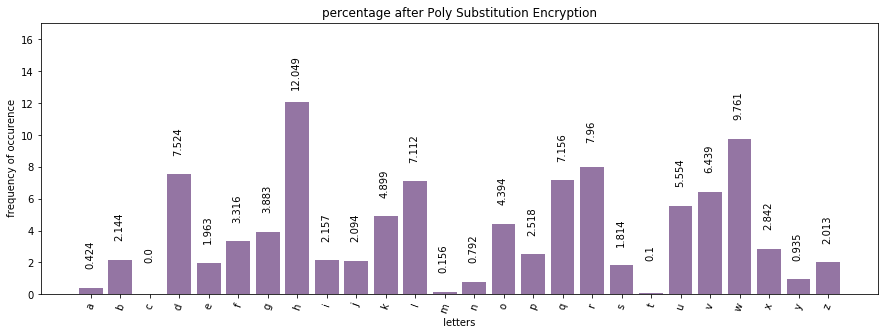

In [220]:
plotDict(polycipherDict , "percentage after Poly Substitution Encryption")